선형회귀는 특성이 많을 수록 큰 효과를 나타냄.\
여러개의 특성을 사용한 선형 회귀를 다중 회귀라고 함.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    perch_full, perch_weight
)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]]) # 새롭게 만들 특성 조합 찾기. 각 특성의 제곱 & 특성끼리의 곱
poly.transform([[2, 3]]) # 실제 데이터 반환

array([[1., 2., 3., 4., 6., 9.]])

In [5]:
# 상수항은 항상 1과 곱한 셈. 그걸 변환 특성에서 빼주는 작업.
# 근데 굳이 적지 않아도 알아서 무시하긴 함.
poly = PolynomialFeatures(include_bias=False)

poly.fit(X_train)
X_train_poly = poly.transform(X_train)
print(X_train_poly.shape)
print(poly.get_feature_names_out())

X_test_poly = poly.transform(X_test) # 훈련 세트 기준으로 테스트도 변환하기

(42, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_poly, y_train)
print(lr.score(X_train_poly, y_train))
print(lr.score(X_test_poly, y_test))

0.9957695972494631
0.9308622945830989


```PolynominalFeatues(degree=5)``` 이런 식으로 제곱 항을 늘릴 수 있음 (이건 5제곱)\
근데 이러면 너무 과대적합이 되어버림. 그래서 규제가 필요하다!

In [7]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly.shape)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_poly)
X_test_scaled = ss.transform(X_test_poly)

(42, 56)


릿지: 계수를 제곱한 값을 기준으로 규제.\
라쏘: 계수의 절댓값을 이용.\
릿지를 더 많이 쓰는 편. 두 알고리즘 모두 계수의 크기를 줄이나 라쏘는 아예 0으로 만들 수도 있음.\
단순 선형 회귀 모델보다 릿지를 쓰기.

In [8]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
print(ridge.score(X_train_scaled, y_train))
print(ridge.score(X_test_scaled, y_test))

0.992191591367361
0.9670911512197352


alpha 값에 대한 R^2 값을 그려보면 적절한 값을 찾을 수 있음.\
훈련세트와 테스트세트 점수가 가장 가까운 지점.

[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]


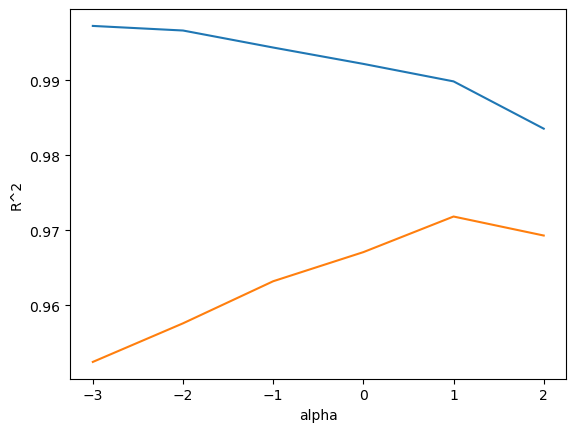

In [15]:
import matplotlib.pyplot as plt

train_score, test_score = [], []

alpha_list = [10 ** i for i in np.arange(-3, 3).astype(float)]
print(alpha_list)

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    train_score.append(ridge.score(X_train_scaled, y_train))
    test_score.append(ridge.score(X_test_scaled, y_test))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # alpha를 1 언저리로 맞추는 게 좋음 (<-결론)

[0.001, 0.0031622776601683794, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0, 316.22776601683796]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.597e+03, tolerance: 5.151e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.837e+03, tolerance: 5.151e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.899e+03, toleranc

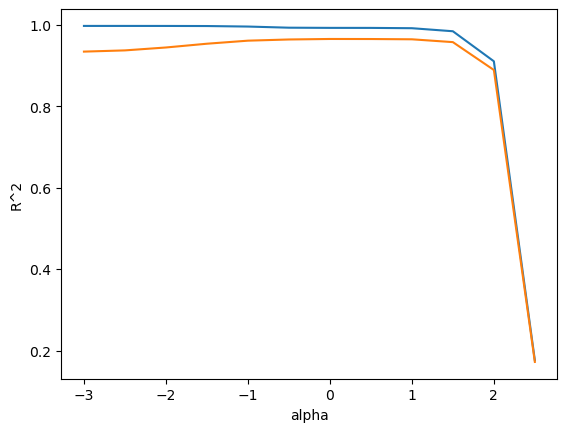

In [14]:
train_score, test_score = [], []

alpha_list = [10 ** i for i in np.arange(-3, 3, 0.5).astype(float)]
print(alpha_list)

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000) # max_iter: 지정 반복 횟수가 부족하면 ConvergenceWarning
    lasso.fit(X_train_scaled, y_train)
    train_score.append(lasso.score(X_train_scaled, y_train))
    test_score.append(lasso.score(X_test_scaled, y_test))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # alpha를 -3 언저리로 맞추는 게 좋음 (<-결론)